<a href="https://colab.research.google.com/github/fabrizioaymone/mlogit-from-scratch/blob/main/mlogit_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X_train, X_test, y_train, y_test = mnist['data'][:60000], mnist['data'][60000:], mnist['target'][:60000], mnist['target'][60000:]


In [ ]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
def _multinomial_loss(X, thetas, y):
    n_instances = np.shape(X)[0]
    logits = np.dot(X, thetas)
    exp_sum = 0
    for i in logits:
        for k in i:
            exp_sum += np.exp(k)
        for k in i:
            k = np.exp(k)/exp_sum
    soft_max = logits
    
    avg_cross_entropy = 0
    for y_hat, y_ground in zip(soft_max, y):
        for y_h, y_g in zip (y_hat, y_ground):
            avg_cross_entropy += -y_g*np.log(y_hat)/n_instances

    return avg_cross_entropy

def SGD_mini_batch(X_batch, thetas, y_batch, n):
    eta = 100
    if n > 2:
        eta = 10
    elif n > 5:
        eta = 1
    elif n >20:
        eta = 1/n
    n_instances = np.shape(X_batch)[0]
    n_features = np.shape(X_batch)[1]
    n_classes = np.shape(y_batch)[1]
    logits = np.dot(X_batch, thetas)
    
    for i, l in enumerate(logits):
        l = np.exp(l-np.max(l))
        
        for j, k in enumerate(l):
            logits[i][j] = k/np.sum(l, axis = 0)

    soft_max = logits

    for k, theta_class in enumerate(np.transpose(thetas)):
        for  p_hat, y_g, x in zip(soft_max, y_batch, X_batch):
            thetas[:,k] = np.transpose(theta_class) - np.multiply(np.transpose(x), eta *1/n_instances*(p_hat[k]-y_g[k]))
    print(thetas[0][0])

    return thetas

class SoftMax_Regression :    
    thetas = None
    def fit(self, X, y, n_epochs, batch_size): 
        
        X = (np.c_[np.ones(np.shape(X.values)[0]), X.values]).astype(np.float128)
        y = pd.get_dummies(y).values
        self.thetas = (np.random.rand(np.shape(X)[1], np.shape(y)[1])).astype(np.float128)
        batch_size = 10
        n_instances = np.shape(X)[0]
        n_features = np.shape(X)[1]
        n_classes = np.shape(y)[1]
        for n in range(n_epochs):
            print('epoch number :'+ str(n))
            for b in range(int(np.shape(X)[0]/batch_size)):
                indexes = random.sample(range(0,n_instances), batch_size)
                X_batch, y_batch = X[indexes, :], y[indexes, :]
                self.thetas = SGD_mini_batch(X_batch, self.thetas, y_batch, n+1)
        print('Model is fitted')
    
    def accuracy_predict(self, X_d, y_d):
        X_d = (np.c_[np.ones(np.shape(X_d.values)[0]), X_d.values]).astype(np.float128)
        y_d = pd.get_dummies(y_d).values
        logits = np.dot(X_d, self.thetas)
        for i, l in enumerate(logits):
            k_max = 0
            for j, k in enumerate(l):
                if k > k_max:
                    k_max = k
            for j, k in enumerate(l):
                if k < k_max:
                    logits[i][j] = 0
                if k == k_max:
                    logits[i][j] = 1
        print(logits)
        correct = 0
        for i, y in zip(logits, y_d):
            for k, y_p in zip(i, y):
                if k == y_p ==1:
                    correct+=1
        print('correct ='+str(correct))
        accuracy = correct/np.shape(X_d)[0]
        
        return accuracy
    def predict(self, X):
        X = (np.c_[1, X]).astype(np.float128)
        logits = np.dot(X, self.thetas)
      
        return np.argmax(logits)


In [ ]:
softmax_clf = SoftMax_Regression()

In [ ]:
softmax_clf.fit(X_train, y_train, 50, 256)

Streaming output truncated to the last 5000 lines.
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.1420334897527349
-1895.

In [ ]:
softmax_clf.accuracy_predict(X_test, y_test)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
correct =9044


0.9044

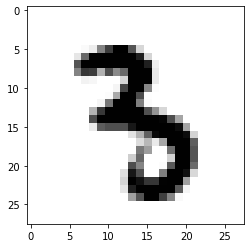

In [ ]:
matrix = mnist.data.to_numpy()
fig = plt.figure
plt.imshow(matrix[-2344].reshape(28,28), cmap='gray_r')
plt.show()


In [ ]:
softmax_clf.predict(matrix[-2344].reshape(1, 784))


3